In [1]:
from sklearn.datasets import make_classification
import numpy as np


In [2]:
import matplotlib.pyplot as plt

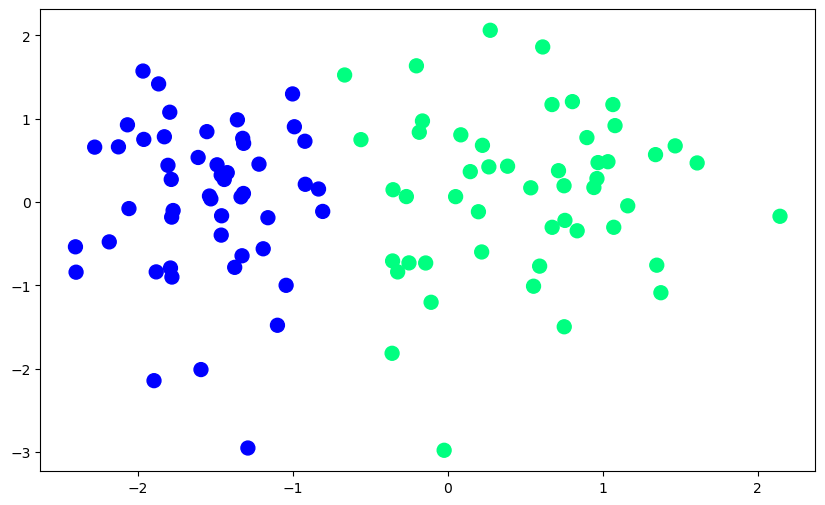

In [75]:
X, y = make_classification(n_samples=100, n_features=2, 
                           n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, 
                           random_state=41,hypercube=False,class_sep=10)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],s=100,c=y,cmap='winter')

In [76]:
def step(z):
    return 1 if z>0 else 0

def percip(X,y):
    X= np.insert(X,0,1,axis=1)
    w = np.ones(X.shape[1])
    lr =0.1
    
    for i in range(1000):
        j = np.random.randint(1,100)
        yhat = step(np.dot(X[j],w))
        w = w + lr*(y[j]-yhat)*X[j]
    return w[0],w[1:]

In [77]:
c,w=percip(X,y)

In [78]:
w,c

(array([1.38359679, 0.10251276]), 0.9)

In [66]:
m = -(w[0]/w[1])
b = -(c/w[1])

In [67]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

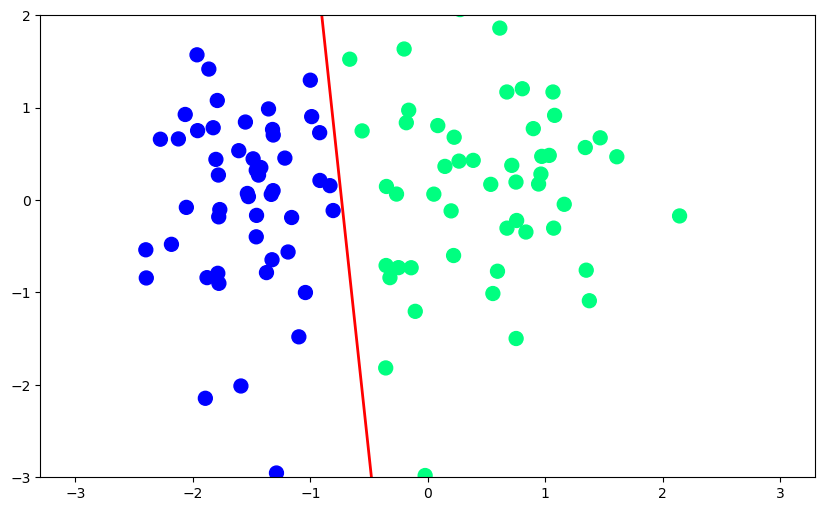

In [69]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [79]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [80]:
intercept_,coef_ = perceptron(X,y)

In [81]:
print(coef_)
print(intercept_)

[1.33109268 0.16780916]
0.9


In [89]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [83]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

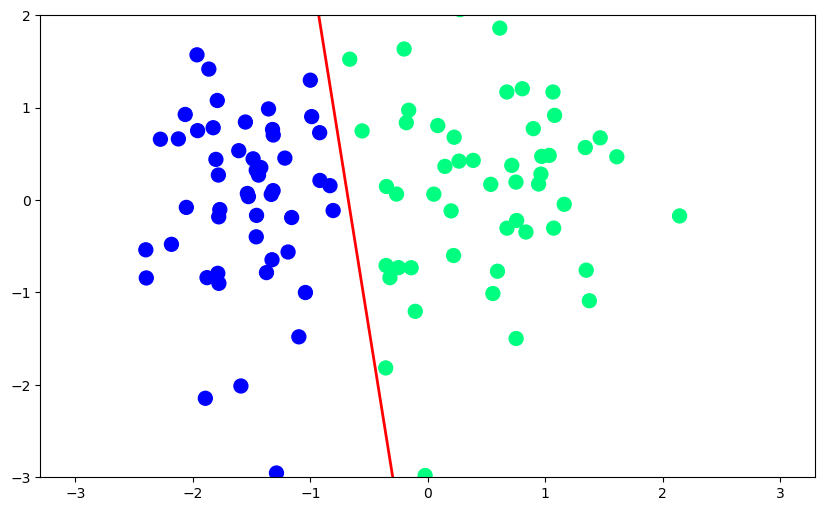

In [85]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [87]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


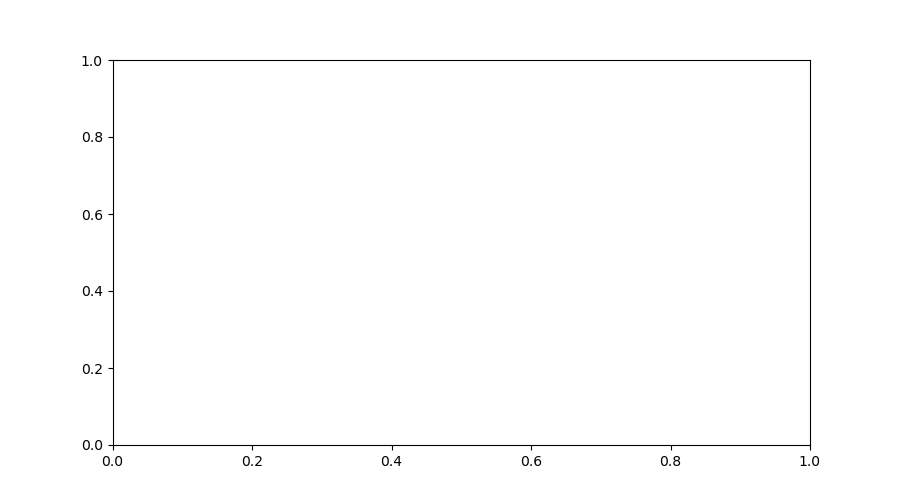

IndexError: invalid index to scalar variable.

In [90]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)